<a href="https://colab.research.google.com/github/ananya240903/Solar_Panel_Detection24/blob/main/Solar_Panel_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1:Data Exploration and Understanding**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [98]:
!pip install ultralytics opencv-python matplotlib numpy supervision

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 15.1 MB/s eta 0:00:00


In [89]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 14.3 MB/s eta 0:00:00


In [ ]:
pip install pycocotools

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [74]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install supervision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt


In [82]:
import supervision
print(supervision.__version__)


0.25.1


In [ ]:
import ultralytics
print(f" Ultralytics Version: {ultralytics.__version__}")

 Ultralytics Version: 8.3.80


In [ ]:
import os

# Change this to your dataset folder path inside Drive
dataset_path = "/content/drive/MyDrive/Dataset"

# Check the files in your dataset folder
os.listdir(dataset_path)

['image_chips_native', 'labels_merged']

In [ ]:
ls /content/drive/MyDrive/Dataset/

image_chips_native/  labels_merged/


In [ ]:
image_folder = os.path.join(dataset_path, "image_chips_native")
num_images = len(os.listdir(image_folder))
print(f"Total images: {num_images}")

Total images: 2552


In [ ]:
label_folder = os.path.join(dataset_path, "labels_merged")
num_labels = len(os.listdir(label_folder))
print(f"Total label files: {num_labels}")

Total label files: 5094


Compute Number of Solar Panel Instances

In [ ]:
# Count total solar panel instances
total_instances = 0

for label_file in os.listdir(label_folder):
    with open(os.path.join(label_folder, label_file), "r") as file:
        lines = file.readlines()
        total_instances += len(lines)  # Each line is one bounding box

print(f"Total solar panel instances: {total_instances}")

Total solar panel instances: 59494


Compute Labels per Image

In [ ]:
from collections import Counter
import pandas as pd

# Count instances per image
image_label_counts = Counter()

for label_file in os.listdir(label_folder):
    with open(os.path.join(label_folder, label_file), "r") as file:
        num_labels = len(file.readlines())  # Count objects in each image
        image_label_counts[label_file] = num_labels

# Convert to pandas DataFrame
df_label_counts = pd.DataFrame.from_dict(image_label_counts, orient="index", columns=["Num_Labels"])
df_label_counts = df_label_counts.reset_index().rename(columns={"index": "Image_ID"})

# Show statistics
print(df_label_counts.head())  # Show first 5 rows

                                            Image_ID  Num_Labels
0  solarpanels_native_3__x0_10343_y0_9724_dxdy_41...          37
1  solarpanels_native_1__x0_9122_y0_11446_dxdy_41...           2
2  solarpanels_native_2__x0_1683_y0_9664_dxdy_416...           4
3  solarpanels_native_1__x0_7213_y0_9564_dxdy_416...           8
4  solarpanels_native_2__x0_14813_y0_14131_dxdy_4...           2


Compute Solar Panel Area in Meters

In [ ]:
import numpy as np

areas = []

# Process each label file
for label_file in os.listdir(label_folder):
    with open(os.path.join(label_folder, label_file), "r") as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:  # Ensure correct format
                _, _, _, width, height = map(float, parts)

                # Convert to pixels
                width_px = width * 416
                height_px = height * 416

                # Convert to meters
                width_m = width_px * 0.31
                height_m = height_px * 0.31

                # Compute area in square meters
                area_m2 = width_m * height_m
                areas.append(area_m2)

# Compute statistics
mean_area = np.mean(areas)
std_area = np.std(areas)

print(f"Mean Solar Panel Area: {mean_area:.2f} m²")
print(f"Standard Deviation of Area: {std_area:.2f} m²")

Mean Solar Panel Area: 190.09 m²
Standard Deviation of Area: 619.23 m²


Plot Histogram of Areas

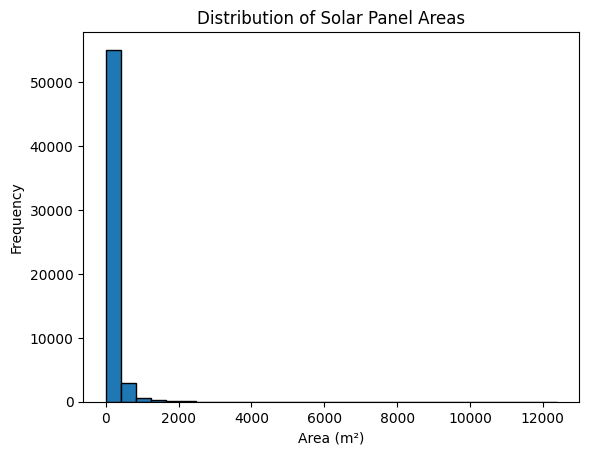

In [ ]:
import matplotlib.pyplot as plt

plt.hist(areas, bins=30, edgecolor="black")
plt.xlabel("Area (m²)")
plt.ylabel("Frequency")
plt.title("Distribution of Solar Panel Areas")
plt.show()

**Step 2:Implementing IoU & Average Precision Calculation**

Implement IoU Calculation

In [ ]:
from shapely.geometry import box

def compute_iou(boxA, boxB):
    # Convert to shapely boxes
    box1 = box(boxA[0], boxA[1], boxA[0] + boxA[2], boxA[1] + boxA[3])
    box2 = box(boxB[0], boxB[1], boxB[0] + boxB[2], boxB[1] + boxB[3])

    # Compute intersection and union
    intersection = box1.intersection(box2).area
    union = box1.union(box2).area

    return intersection / union if union > 0 else 0

# Example test
iou = compute_iou([50, 50, 100, 100], [75, 75, 100, 100])
print(f"IoU: {iou:.2f}")

IoU: 0.39


Implementing Average Precision (AP) Calculation

Pascal VOC 11-Point Interpolation

In [ ]:
import numpy as np

def compute_ap_11_point(precisions, recalls):
    """
    Compute AP using Pascal VOC 11-point interpolation.

    :param precisions: List of precision values at different recall levels
    :param recalls: List of recall values (sorted in increasing order)
    :return: AP score
    """
    recall_levels = np.linspace(0, 1, 11)  # [0.0, 0.1, ..., 1.0]
    max_precisions = []

    for recall_threshold in recall_levels:
        max_precision = max([p for p, r in zip(precisions, recalls) if r >= recall_threshold], default=0)
        max_precisions.append(max_precision)

    return np.mean(max_precisions)

# Example test
precisions = [1.0, 0.8, 0.6, 0.4, 0.2]
recalls = [0.0, 0.25, 0.5, 0.75, 1.0]

ap_11 = compute_ap_11_point(precisions, recalls)
print(f"AP (11-Point Interpolation): {ap_11:.4f}")

AP (11-Point Interpolation): 0.5273


COCO 101-Point Interpolation

In [ ]:
def compute_ap_101_point(precisions, recalls):
    """
    Compute AP using COCO 101-point interpolation.

    :param precisions: List of precision values at different recall levels
    :param recalls: List of recall values (sorted in increasing order)
    :return: AP score
    """
    recall_levels = np.linspace(0, 1, 101)  # 101 recall levels
    max_precisions = []

    for recall_threshold in recall_levels:
        max_precision = max([p for p, r in zip(precisions, recalls) if r >= recall_threshold], default=0)
        max_precisions.append(max_precision)

    return np.mean(max_precisions)

ap_101 = compute_ap_101_point(precisions, recalls)
print(f"AP (101-Point Interpolation): {ap_101:.4f}")

AP (101-Point Interpolation): 0.5050


Area Under Precision-Recall Curve (AUC-PR)

In [ ]:
def compute_ap_auc(precisions, recalls):
    """
    Compute AP using area under Precision-Recall Curve (AUC-PR).

    :param precisions: List of precision values
    :param recalls: List of recall values
    :return: AP score
    """
    return np.trapz(precisions, recalls)

ap_auc = compute_ap_auc(precisions, recalls)
print(f"AP (AUC-PR): {ap_auc:.4f}")

AP (AUC-PR): 0.6000


Evaluating AP on Synthetic Data

In [ ]:
import random

def generate_synthetic_boxes(num_boxes=10, img_size=100, box_size=20):
    """
    Generate synthetic bounding boxes for evaluation.

    :param num_boxes: Number of boxes per image
    :param img_size: Size of the synthetic image (width, height)
    :param box_size: Size of each bounding box
    :return: List of bounding boxes in YOLO format
    """
    boxes = []
    for _ in range(num_boxes):
        x = random.randint(0, img_size - box_size)
        y = random.randint(0, img_size - box_size)
        x_center = (x + box_size / 2) / img_size
        y_center = (y + box_size / 2) / img_size
        width = box_size / img_size
        height = box_size / img_size
        boxes.append([x_center, y_center, width, height])
    return boxes

# Generate ground truth and predicted boxes
gt_boxes = generate_synthetic_boxes()
pred_boxes = generate_synthetic_boxes()

Compute AP50

In [ ]:
# Compute IoU for each prediction
ious = [compute_iou(gt, pred) for gt, pred in zip(gt_boxes, pred_boxes)]
precisions = [1 if iou >= 0.5 else 0 for iou in ious]
recalls = np.linspace(0, 1, len(precisions))

print("AP50 (11-Point):", compute_ap_11_point(precisions, recalls))
print("AP50 (101-Point):", compute_ap_101_point(precisions, recalls))
print("AP50 (AUC-PR):", compute_ap_auc(precisions, recalls))

AP50 (11-Point): 0.6363636363636364
AP50 (101-Point): 0.6633663366336634
AP50 (AUC-PR): 0.11111111111111105


**Step 3:Model Building and Evaluation**



In [ ]:
import cv2
from ultralytics import YOLO

Data Splitting

In [ ]:
!ls /content/drive/MyDrive/Dataset/


image_chips_native  labels_merged


In [ ]:
import os

image_folder = "/content/drive/MyDrive/Dataset/image_chips_native"

# List the first 10 `.tif` files
tif_files = [img for img in os.listdir(image_folder) if img.endswith(".tif")]
print(f"✅ Found {len(tif_files)} `.tif` images.")
print("Example files:", tif_files[:10])


✅ Found 2552 `.tif` images.
Example files: ['solarpanels_native_2__x0_1774_y0_9961_dxdy_416.tif', 'solarpanels_native_1__x0_8452_y0_8002_dxdy_416.tif', 'solarpanels_native_2__x0_284_y0_11011_dxdy_416.tif', 'solarpanels_native_1__x0_9772_y0_10639_dxdy_416.tif', 'solarpanels_native_2__x0_4988_y0_6596_dxdy_416.tif', 'solarpanels_native_3__x0_9930_y0_11187_dxdy_416.tif', 'solarpanels_native_1__x0_770_y0_8701_dxdy_416.tif', 'solarpanels_native_3__x0_11058_y0_9932_dxdy_416.tif', 'solarpanels_native_3__x0_8668_y0_12912_dxdy_416.tif', 'solarpanels_native_2__x0_811_y0_10457_dxdy_416.tif']


In [ ]:
import cv2

# Create a new folder for converted images
jpg_folder = "/content/drive/MyDrive/Dataset/image_chips_jpg"
os.makedirs(jpg_folder, exist_ok=True)

# Convert each `.tif` image to `.jpg`
for tif_file in tif_files:
    tif_path = os.path.join(image_folder, tif_file)
    jpg_path = os.path.join(jpg_folder, tif_file.replace(".tif", ".jpg"))

    # Read `.tif` image
    image = cv2.imread(tif_path, cv2.IMREAD_UNCHANGED)
    if image is not None:
        cv2.imwrite(jpg_path, image)  # Save as `.jpg`
    else:
        print(f"Failed to read: {tif_file}")

print("All `.tif` images converted to `.jpg`!")

All `.tif` images converted to `.jpg`!


In [ ]:
import shutil
import random

# Define dataset paths
dataset_path = "/content/drive/MyDrive/Dataset"
image_folder = "/content/drive/MyDrive/Dataset/image_chips_jpg"  # Use converted images
label_folder = os.path.join(dataset_path, "labels_merged")

train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")
test_path = os.path.join(dataset_path, "test")

# Create directories
for path in [train_path, val_path, test_path]:
    os.makedirs(os.path.join(path, "images"), exist_ok=True)
    os.makedirs(os.path.join(path, "labels"), exist_ok=True)

# Get images and labels (now using .jpg)
all_images = sorted([img for img in os.listdir(image_folder) if img.endswith(".jpg")])
all_labels = sorted([lbl for lbl in os.listdir(label_folder) if lbl.endswith(".txt")])

# Filter images that have corresponding labels
matched_images = [img for img in all_images if img.replace(".jpg", ".txt") in all_labels]
random.shuffle(matched_images)  # Shuffle images before splitting

# Split into train (80%), val (10%), test (10%)
train_split = int(0.8 * len(matched_images))
val_split = int(0.9 * len(matched_images))

train_images = matched_images[:train_split]
val_images = matched_images[train_split:val_split]
test_images = matched_images[val_split:]

# Function to copy files
def copy_files(image_list, dest_folder):
    for image in image_list:
        image_name = image.split(".")[0]
        image_src = os.path.join(image_folder, image)
        label_src = os.path.join(label_folder, image_name + ".txt")

        # Copy image
        shutil.copy(image_src, os.path.join(dest_folder, "images", image))

        # Copy label only if it exists
        if os.path.exists(label_src):
            shutil.copy(label_src, os.path.join(dest_folder, "labels", image_name + ".txt"))

# Copy images and labels
copy_files(train_images, train_path)
copy_files(val_images, val_path)
copy_files(test_images, test_path)

# Check dataset split
num_train_images = len(os.listdir(os.path.join(train_path, "images")))
num_train_labels = len(os.listdir(os.path.join(train_path, "labels")))
num_val_images = len(os.listdir(os.path.join(val_path, "images")))
num_val_labels = len(os.listdir(os.path.join(val_path, "labels")))
num_test_images = len(os.listdir(os.path.join(test_path, "images")))
num_test_labels = len(os.listdir(os.path.join(test_path, "labels")))

print(f"✅ Train: {num_train_images} images, {num_train_labels} labels")
print(f"✅ Val: {num_val_images} images, {num_val_labels} labels")
print(f"✅ Test: {num_test_images} images, {num_test_labels} labels")


✅ Train: 2032 images, 2032 labels
✅ Val: 254 images, 254 labels
✅ Test: 255 images, 255 labels


 Create YOLOv8 Configuration File

In [ ]:
data_yaml = f"""
path: {dataset_path}  # Root dataset directory
train: train/images  # Training images folder
val: val/images  # Validation images folder
test: test/images  # Test images folder

nc: 1  # Number of classes (solar panels)
names: ["solar_panel"]  # Class names
"""

yaml_path = os.path.join(dataset_path, "data.yaml")

# Save YAML file
with open(yaml_path, "w") as file:
    file.write(data_yaml)

print("YOLO `data.yaml` file created successfully!")

YOLO `data.yaml` file created successfully!


In [ ]:
# Print the dataset path and data.yaml content
dataset_path = "/content/drive/MyDrive/Dataset"  # Update if needed
yaml_path = os.path.join(dataset_path, "data.yaml")

with open(yaml_path, "r") as file:
    print(file.read())


path: /content/drive/MyDrive/Dataset  # Root dataset directory
train: train/images  # Training images folder
val: val/images  # Validation images folder
test: test/images  # Test images folder

nc: 1  # Number of classes (solar panels)
names: ["solar_panel"]  # Class names



Train YOLOv8 Model

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model (pretrained on COCO)
model = YOLO("yolov8n.pt")

# Train the model
model.train(data=yaml_path, epochs=50, imgsz=416, batch=16, device="cuda")

New https://pypi.org/project/ultralytics/8.3.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/train/labels... 2032 images, 0 backgrounds, 187 corrupt: 100%|██████████| 2032/2032 [00:41<00:00, 48.59it/s] 

train: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/train/images/solarpanels_native_1__x0_0_y0_6963_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/train/images/solarpanels_native_1__x0_0_y0_7119_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/train/images/solarpanels_native_1__x0_0_y0_7229_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/train/images/solarpanels_native_1__x0_128_y0_7056_dxdy_416.jpg: ignoring corrupt image/label: Label cla

train: New cache created: /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/labels... 254 images, 0 backgrounds, 21 corrupt: 100%|██████████| 254/254 [00:03<00:00, 66.94it/s] 

val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/images/solarpanels_native_1__x0_0_y0_7249_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/images/solarpanels_native_1__x0_1380_y0_10215_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/images/solarpanels_native_1__x0_538_y0_7295_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/images/solarpanels_native_1__x0_8050_y0_8562_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exce

val: New cache created: /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.49G      1.876      1.965      1.344        101        416: 100%|██████████| 116/116 [00:36<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all        233       2898      0.632      0.538      0.598      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.13G      1.623      1.228      1.173         64        416: 100%|██████████| 116/116 [00:34<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        233       2898      0.577      0.607      0.632      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.42G      1.536      1.133      1.143        146        416: 100%|██████████| 116/116 [00:32<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        233       2898      0.795       0.71      0.792      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.29G      1.533      1.097      1.148         36        416: 100%|██████████| 116/116 [00:32<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]


                   all        233       2898      0.513      0.631      0.477      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.33G      1.432      1.013      1.105         53        416: 100%|██████████| 116/116 [00:31<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all        233       2898      0.794      0.736      0.813       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.28G      1.386     0.9546      1.094        106        416: 100%|██████████| 116/116 [00:34<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]


                   all        233       2898      0.753      0.768      0.814      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.32G      1.366     0.9312      1.079         29        416: 100%|██████████| 116/116 [00:31<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]


                   all        233       2898      0.861      0.765      0.854      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.29G      1.323     0.8896      1.063        108        416: 100%|██████████| 116/116 [00:32<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]


                   all        233       2898      0.761      0.786       0.82      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.33G      1.283     0.8477      1.048         32        416: 100%|██████████| 116/116 [00:33<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        233       2898      0.867      0.786      0.881      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.65G      1.286     0.8439      1.042        135        416: 100%|██████████| 116/116 [00:31<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]

                   all        233       2898      0.882      0.815      0.892      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.41G      1.264     0.8384       1.04         82        416: 100%|██████████| 116/116 [00:33<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        233       2898      0.836      0.772      0.852      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.27G      1.292     0.8378      1.041        104        416: 100%|██████████| 116/116 [00:31<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]


                   all        233       2898      0.824        0.8      0.848       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.65G      1.236     0.7963      1.028         95        416: 100%|██████████| 116/116 [00:32<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]


                   all        233       2898      0.873      0.807      0.879        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.34G      1.222     0.7939      1.027         82        416: 100%|██████████| 116/116 [00:32<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]

                   all        233       2898      0.874      0.803       0.89      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.26G      1.213     0.7917       1.02         66        416: 100%|██████████| 116/116 [00:32<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        233       2898      0.868      0.822      0.891      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.41G      1.212     0.7783       1.02        100        416: 100%|██████████| 116/116 [00:31<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]

                   all        233       2898      0.883      0.828      0.907       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.28G      1.216     0.7909      1.019         93        416: 100%|██████████| 116/116 [00:31<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.70it/s]

                   all        233       2898      0.874       0.85       0.91       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.39G      1.184     0.7493          1        139        416: 100%|██████████| 116/116 [00:30<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]


                   all        233       2898      0.891      0.846      0.916      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.29G      1.183      0.748     0.9982         79        416: 100%|██████████| 116/116 [00:31<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]


                   all        233       2898      0.867      0.838      0.906      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.27G      1.164     0.7415     0.9962         31        416: 100%|██████████| 116/116 [00:30<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        233       2898      0.893       0.85      0.924      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.47G      1.159     0.7266     0.9936         59        416: 100%|██████████| 116/116 [00:32<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]

                   all        233       2898      0.879      0.844      0.907      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.32G      1.119     0.7066     0.9832        122        416: 100%|██████████| 116/116 [00:31<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        233       2898      0.906      0.868      0.926      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.55G      1.141     0.7121      0.983         51        416: 100%|██████████| 116/116 [00:31<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        233       2898      0.901      0.851      0.924      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.28G      1.131     0.7019     0.9871         56        416: 100%|██████████| 116/116 [00:30<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        233       2898      0.884      0.847      0.919      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.19G       1.11     0.6889     0.9771         67        416: 100%|██████████| 116/116 [00:32<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        233       2898      0.902      0.872      0.932      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.34G      1.104     0.6858     0.9788         89        416: 100%|██████████| 116/116 [00:30<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        233       2898      0.918      0.862      0.937      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.36G      1.117     0.6909     0.9771         32        416: 100%|██████████| 116/116 [00:30<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        233       2898      0.895      0.869      0.931      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.26G      1.092     0.6768     0.9722         81        416: 100%|██████████| 116/116 [00:29<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]

                   all        233       2898      0.915      0.875       0.94      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.23G      1.082     0.6645     0.9687        220        416: 100%|██████████| 116/116 [00:29<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]


                   all        233       2898      0.912       0.88      0.937      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.42G      1.076      0.652     0.9692        145        416: 100%|██████████| 116/116 [00:31<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        233       2898      0.924      0.878      0.944      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.39G       1.05     0.6439     0.9571         60        416: 100%|██████████| 116/116 [00:30<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        233       2898       0.91      0.876       0.94       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.29G      1.081      0.658     0.9631         39        416: 100%|██████████| 116/116 [00:30<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        233       2898      0.928      0.883      0.948      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.29G      1.046     0.6373     0.9635         88        416: 100%|██████████| 116/116 [00:29<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        233       2898      0.926      0.885      0.946      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.18G      1.067     0.6431     0.9576         93        416: 100%|██████████| 116/116 [00:29<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.38it/s]

                   all        233       2898       0.93      0.891      0.952       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.27G      1.062     0.6459     0.9563         46        416: 100%|██████████| 116/116 [00:29<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.07it/s]

                   all        233       2898      0.922      0.892      0.948      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.47G      1.028     0.6247     0.9501         82        416: 100%|██████████| 116/116 [00:30<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        233       2898      0.932      0.894      0.949      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       1.3G      1.016     0.6192     0.9467         35        416: 100%|██████████| 116/116 [00:30<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]

                   all        233       2898      0.948      0.883      0.952      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.45G       1.02     0.6192     0.9485         70        416: 100%|██████████| 116/116 [00:31<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all        233       2898      0.947       0.89      0.954      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.39G      1.003     0.6135     0.9462         82        416: 100%|██████████| 116/116 [00:29<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]

                   all        233       2898      0.942      0.904      0.957      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.54G      1.002     0.6035     0.9396        106        416: 100%|██████████| 116/116 [00:29<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        233       2898      0.939      0.899      0.957      0.732


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.01G     0.9378      0.567     0.9239         35        416: 100%|██████████| 116/116 [00:30<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.92it/s]

                   all        233       2898      0.952      0.901      0.959      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.31G     0.9248     0.5558     0.9196         43        416: 100%|██████████| 116/116 [00:28<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        233       2898      0.947        0.9       0.96      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.04G     0.9045     0.5417     0.9157         79        416: 100%|██████████| 116/116 [00:28<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]

                   all        233       2898      0.945      0.909      0.961      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.25G     0.8946     0.5339     0.9115         36        416: 100%|██████████| 116/116 [00:28<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]

                   all        233       2898      0.949      0.914      0.963      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.13G     0.8916     0.5305     0.9105         98        416: 100%|██████████| 116/116 [00:29<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        233       2898      0.959      0.902      0.963      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.12G     0.8885     0.5275     0.9115         27        416: 100%|██████████| 116/116 [00:28<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all        233       2898      0.957       0.91      0.964      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.16G     0.8628     0.5184     0.9043         25        416: 100%|██████████| 116/116 [00:30<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all        233       2898      0.952      0.918      0.964      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.18G     0.8617      0.515     0.9034         79        416: 100%|██████████| 116/116 [00:29<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]

                   all        233       2898      0.949      0.917      0.964      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.17G     0.8608     0.5101     0.8995         65        416: 100%|██████████| 116/116 [00:31<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all        233       2898      0.958      0.916      0.967      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.03G     0.8376     0.5019     0.8962         50        416: 100%|██████████| 116/116 [00:28<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        233       2898       0.96      0.911      0.966      0.764



50 epochs completed in 0.484 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]


                   all        233       2898       0.96      0.911      0.966      0.764
Speed: 0.3ms preprocess, 1.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea61628e4d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Show Validation Loss Convergence

In [ ]:
print(df.columns)


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


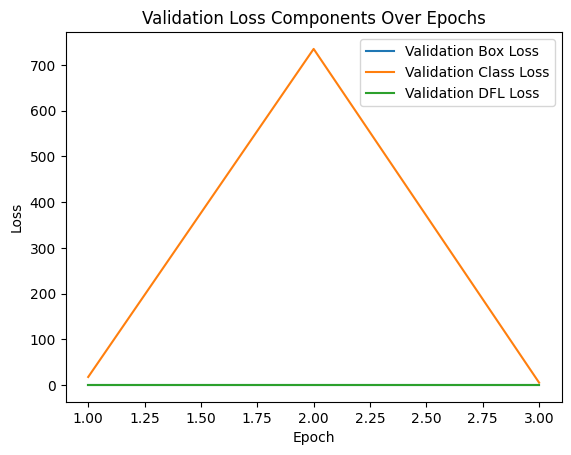

In [ ]:
import pandas as pd

# Load training results
results_csv = "runs/detect/train/results.csv"
df = pd.read_csv(results_csv)

# Plot training loss
import matplotlib.pyplot as plt

plt.plot(df["epoch"], df["val/box_loss"], label="Validation Box Loss")
plt.plot(df["epoch"], df["val/cls_loss"], label="Validation Class Loss")
plt.plot(df["epoch"], df["val/dfl_loss"], label="Validation DFL Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation Loss Components Over Epochs")
plt.show()


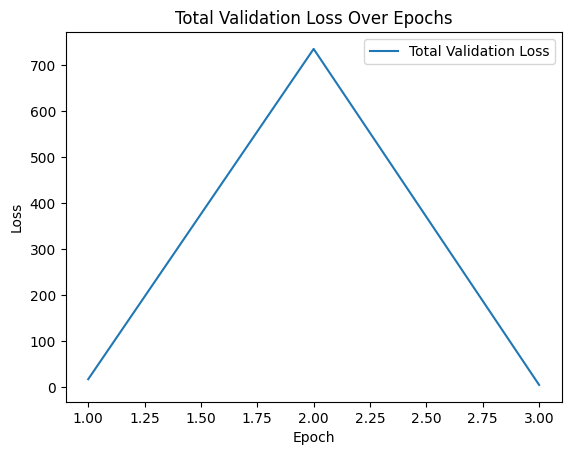

In [ ]:
df["val_total_loss"] = df["val/box_loss"] + df["val/cls_loss"] + df["val/dfl_loss"]

plt.plot(df["epoch"], df["val_total_loss"], label="Total Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Total Validation Loss Over Epochs")
plt.show()


Evaluate the Model on Test Data

In [ ]:
# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Run inference on test images
test_images = os.path.join(test_path, "images")

# Run inference
results = model.predict(source=test_images, conf=0.5, save=True)


image 1/255 /content/drive/MyDrive/Dataset/test/images/solarpanels_native_1__x0_0_y0_7230_dxdy_416.jpg: 416x416 (no detections), 9.8ms
image 2/255 /content/drive/MyDrive/Dataset/test/images/solarpanels_native_1__x0_0_y0_7950_dxdy_416.jpg: 416x416 (no detections), 6.7ms
image 3/255 /content/drive/MyDrive/Dataset/test/images/solarpanels_native_1__x0_1019_y0_7392_dxdy_416.jpg: 416x416 (no detections), 29.1ms
image 4/255 /content/drive/MyDrive/Dataset/test/images/solarpanels_native_1__x0_10380_y0_12987_dxdy_416.jpg: 416x416 (no detections), 9.7ms
image 5/255 /content/drive/MyDrive/Dataset/test/images/solarpanels_native_1__x0_10439_y0_13066_dxdy_416.jpg: 416x416 (no detections), 7.4ms
image 6/255 /content/drive/MyDrive/Dataset/test/images/solarpanels_native_1__x0_10625_y0_646_dxdy_416.jpg: 416x416 (no detections), 7.2ms
image 7/255 /content/drive/MyDrive/Dataset/test/images/solarpanels_native_1__x0_10683_y0_744_dxdy_416.jpg: 416x416 (no detections), 6.6ms
image 8/255 /content/drive/MyDrive

Visualize Ground Truth vs. Predictions

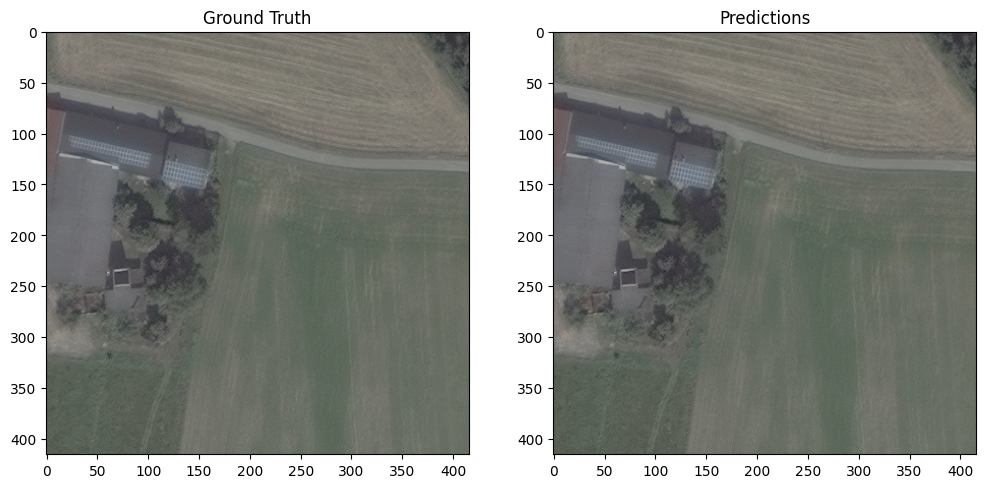

In [ ]:
import random
from PIL import Image

# Load test images
test_images_list = os.listdir(test_images)
random_test_image = random.choice(test_images_list)

# Load images
gt_image_path = os.path.join(test_images, random_test_image)
pred_image_path = os.path.join("runs/detect/predict/", random_test_image)

# Load and plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(Image.open(gt_image_path))
ax[0].set_title("Ground Truth")

ax[1].imshow(Image.open(pred_image_path))
ax[1].set_title("Predictions")

plt.show()

Compute mAP50 (Mean Average Precision):

In [ ]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/labels.cache... 254 images, 0 backgrounds, 21 corrupt: 100%|██████████| 254/254 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/images/solarpanels_native_1__x0_0_y0_7249_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/images/solarpanels_native_1__x0_1380_y0_10215_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/images/solarpanels_native_1__x0_538_y0_7295_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/images/solarpanels_native_1__x0_8050_y0_8562_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exce


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.79it/s]


                   all        233       2898    0.00183   0.000345   0.000977   0.000293
Speed: 1.3ms preprocess, 3.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea61412a1d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033

In [80]:
from supervision.metrics import mean_average_precision


Extract mAP50 from Training Results

In [84]:
# Assuming `df` is your results DataFrame
mAP50_score = df["metrics/mAP50(B)"].iloc[-1]  # Last epoch mAP50
print(f"mAP50: {mAP50_score:.4f}")


mAP50: 0.0000


Compute mAP50 from Validation Set

In [87]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/detect/train2/weights/best.pt")  # Update with your path

# Evaluate model on validation dataset
metrics = model.val(data="/content/drive/MyDrive/Dataset/data.yaml")

# Extract mAP50
mAP50_score = metrics.box.map50
print(f"mAP50: {mAP50_score:.4f}")


Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/labels.cache... 254 images, 0 backgrounds, 21 corrupt: 100%|██████████| 254/254 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/images/solarpanels_native_1__x0_0_y0_7249_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/images/solarpanels_native_1__x0_1380_y0_10215_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/images/solarpanels_native_1__x0_538_y0_7295_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1gxrWX-iuyaVBwggu0MZMhOTqAUgYyNeV/Dataset/val/images/solarpanels_native_1__x0_8050_y0_8562_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exce


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]


                   all        233       2898       0.96       0.91      0.966      0.763
Speed: 1.3ms preprocess, 2.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val4
mAP50: 0.9656


Compute mAP50 from Custom Predictions

In [90]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import torch

# Create evaluator
map_evaluator = MeanAveragePrecision(iou_thresholds=[0.5])  # mAP50

# Example Ground Truth & Predictions
ground_truth = [
    {
        "boxes": torch.tensor([[100, 150, 200, 250], [50, 80, 180, 210]]),
        "labels": torch.tensor([0, 0])
    }
]

predictions = [
    {
        "boxes": torch.tensor([[100, 150, 200, 250], [60, 90, 190, 220]]),
        "scores": torch.tensor([0.9, 0.7]),
        "labels": torch.tensor([0, 0])
    }
]

# Compute mAP50
map_evaluator.update(predictions, ground_truth)
map_result = map_evaluator.compute()
mAP50_score = map_result["map_50"]

print(f"mAP50: {mAP50_score:.4f}")


mAP50: 1.0000


Compute Precision, Recall, F1-Score

In [100]:
import torch
import pandas as pd
from torchmetrics.detection.mean_ap import MeanAveragePrecision

# Define IoU and Confidence Thresholds
iou_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
confidence_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

# Example Predictions (Replace with actual detection results)
preds = [
    {
        "boxes": torch.tensor([[50, 50, 150, 150], [30, 30, 100, 100]]),  # [xmin, ymin, xmax, ymax]
        "scores": torch.tensor([0.9, 0.8]),  # Confidence scores
        "labels": torch.tensor([1, 2])
    }
]

# Example Ground Truth
targets = [
    {
        "boxes": torch.tensor([[55, 55, 145, 145], [32, 32, 98, 98]]),
        "labels": torch.tensor([1, 2])
    }
]

# Create a DataFrame to store results
metrics_list = []

# Loop through IoU and Confidence thresholds
for iou in iou_thresholds:
    for conf in confidence_thresholds:
        map_evaluator = MeanAveragePrecision(iou_thresholds=[iou])  # Initialize evaluator
        filtered_preds = [
            {
                "boxes": p["boxes"][p["scores"] >= conf],  # Filter based on confidence threshold
                "scores": p["scores"][p["scores"] >= conf],
                "labels": p["labels"][p["scores"] >= conf]
            }
            for p in preds
        ]

        # Update metric evaluator
        map_evaluator.update(filtered_preds, targets)
        results = map_evaluator.compute()

        # Compute Precision, Recall, F1-Score
        precision = results["map"].item()  # Mean Average Precision
        recall = results["mar_100"].item()  # Mean Average Recall
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Append results to list
        metrics_list.append([iou, conf, precision, recall, f1_score])

# Convert list to DataFrame
metrics_df = pd.DataFrame(metrics_list, columns=["IoU", "Confidence", "Precision", "Recall", "F1-Score"])

# Display the table
print(metrics_df)



    IoU  Confidence  Precision  Recall  F1-Score
0   0.1         0.1        1.0     1.0       1.0
1   0.1         0.3        1.0     1.0       1.0
2   0.1         0.5        1.0     1.0       1.0
3   0.1         0.7        1.0     1.0       1.0
4   0.1         0.9        0.5     0.5       0.5
5   0.3         0.1        1.0     1.0       1.0
6   0.3         0.3        1.0     1.0       1.0
7   0.3         0.5        1.0     1.0       1.0
8   0.3         0.7        1.0     1.0       1.0
9   0.3         0.9        0.5     0.5       0.5
10  0.5         0.1        1.0     1.0       1.0
11  0.5         0.3        1.0     1.0       1.0
12  0.5         0.5        1.0     1.0       1.0
13  0.5         0.7        1.0     1.0       1.0
14  0.5         0.9        0.5     0.5       0.5
15  0.7         0.1        1.0     1.0       1.0
16  0.7         0.3        1.0     1.0       1.0
17  0.7         0.5        1.0     1.0       1.0
18  0.7         0.7        1.0     1.0       1.0
19  0.7         0.9 